In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
import pandas as pd

In [2]:
! ls stats


 normal10000losses
 normal10000stats
 normal15000losses
 normal15000stats
'sac_checkpoint_hockey_defense_et=False_a=0.05000000074505806_weak=False_e=25000_r=4.1145.pkl'
'sac_checkpoint_hockey_defense_et=False_a=0.0_weak=False_e=25000_r=6.9651.pkl'
'sac_checkpoint_hockey_defense_et=False_a=0.20000000298023224_weak=False_e=25000_r=-0.6959.pkl'
'sac_checkpoint_hockey_defense_et=False_a=0.4000000059604645_weak=False_e=25000_r=-1.9725.pkl'
'sac_checkpoint_hockey_defense_weak=False_e=25000_r=6.3311losses'
'sac_checkpoint_hockey_defense_weak=False_e=25000_r=6.3311stats'
'sac_checkpoint_hockey_normal_et=True_a=tensor([0.0007], grad_fn=<ExpBackward0>)_weak=False_e=5000_r=-5.122.pkl'
'sac_checkpoint_hockey_normal_weak=True_e=25000_r=9.1819.pkl'
'sac_checkpoint_hockey_selfplay_e=100.pkl'
'sac_checkpoint_hockey_selfplay_e=10_2_resets.pkl'
'sac_checkpoint_hockey_selfplay_e=2000.pkl'
'sac_checkpoint_hockey_selfplay_e=2500_4_resets.pkl'
'sac_checkpoint_hockey_selfplay_e=5000.pkl'


## Alpha analysis

In [7]:
f_0 = 'stats/sac_checkpoint_hockey_defense_et=False_a=0.0_weak=False_e=25000_r=6.9651.pkl'
f_005 = 'stats/sac_checkpoint_hockey_defense_et=False_a=0.05000000074505806_weak=False_e=25000_r=4.1145.pkl'
f_02 = 'stats/sac_checkpoint_hockey_defense_et=False_a=0.20000000298023224_weak=False_e=25000_r=-0.6959.pkl'
f_04 = 'stats/sac_checkpoint_hockey_defense_et=False_a=0.4000000059604645_weak=False_e=25000_r=-1.9725.pkl'
f_auto = 'stats/sac_checkpoint_hockey_defense_et=True_a=0.0013_weak=False_e=25000_r=5.9398.pkl'
with open(f_0, 'rb') as f:
    f_0_dict = pickle.load(f)
with open(f_005, 'rb') as f:
    f_005_dict = pickle.load(f)
with open(f_02, 'rb') as f:
    f_02_dict = pickle.load(f)
with open(f_04, 'rb') as f:
    f_04_dict = pickle.load(f)
with open(f_auto, 'rb') as f:
    f_auto_dict = pickle.load(f)

In [20]:
# stats for automatic entropy tuning still in text file
stats_automatic = np.loadtxt('stats/sac_checkpoint_hockey_defense_weak=False_e=25000_r=6.3311losses')
stats_automatic.shape

(800000, 4)

In [5]:
with open('stats/sac_checkpoint_hockey_normal_et=True_a=tensor([0.0007], grad_fn=<ExpBackward0>)_weak=False_e=5000_r=-5.122.pkl', 'rb') as f:
    only_normal_dict = pickle.load(f)

In [11]:
losses = np.asarray(only_normal_dict['losses'])
alphas = losses[:, 3]

In [21]:
alphas = stats_automatic[:, 3]
print(alphas[9000:10000])

[0.00239097 0.00239086 0.00239074 0.00239054 0.00239029 0.00239008
 0.00238988 0.00238963 0.00238947 0.00238939 0.00238937 0.00238947
 0.00238946 0.00238942 0.00238945 0.00238957 0.00238959 0.00238967
 0.00238973 0.00238992 0.00239013 0.0023904  0.00239053 0.00239065
 0.00239063 0.00239058 0.0023905  0.00239037 0.00239015 0.00238991
 0.00238972 0.00238951 0.00238928 0.00238906 0.00238886 0.00238869
 0.0023887  0.00238879 0.00238898 0.00238925 0.00238937 0.00238949
 0.00238986 0.00239026 0.00239077 0.00239125 0.00239161 0.00239191
 0.00239224 0.00239257 0.00239298 0.00239351 0.00239421 0.00239475
 0.00239528 0.00239584 0.00239638 0.00239704 0.00239786 0.00239862
 0.00239945 0.00240027 0.00240103 0.00240181 0.00240248 0.00240296
 0.00240344 0.00240394 0.00240434 0.00240475 0.00240506 0.0024054
 0.00240569 0.00240608 0.00240638 0.00240664 0.002407   0.00240725
 0.00240751 0.00240776 0.00240791 0.00240815 0.00240829 0.00240835
 0.00240841 0.00240835 0.00240831 0.00240815 0.00240804 0.00240

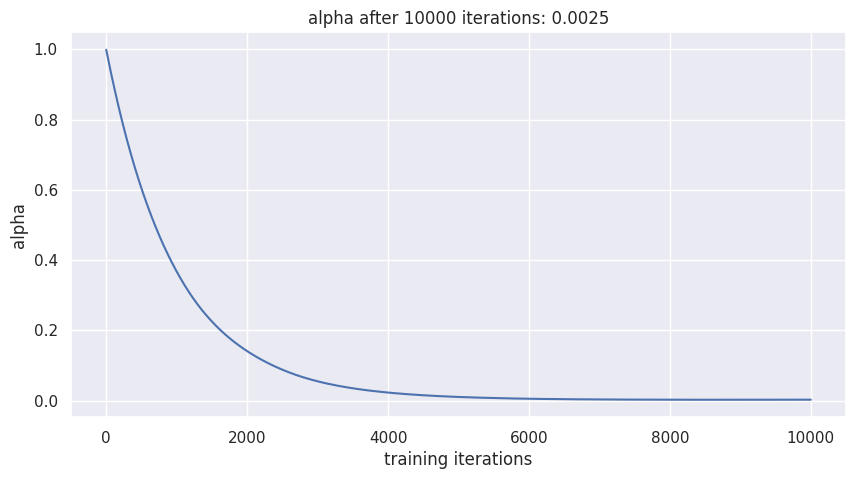

In [23]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(10, 5)})
alpha_df = pd.DataFrame({'alpha': alphas[:10000]})
alpha_df = alpha_df.reset_index().rename(columns={'index': 'training iterations'})
ax = sns.lineplot(x='training iterations', y='alpha', data=alpha_df)
ax.set_title(f'alpha after 10000 iterations: {round(alphas[9999], 4)}')
fig = ax.get_figure()
fig.savefig('automatic_alpha_plot')

In [11]:
# winners = np.asarray(stats_dict['winners'])
# losses = np.asarray(stats_dict['losses'])
# stats = np.asarray(stats_dict['stats'])


In [11]:
winners_0 = np.asarray(f_0_dict['winners'])
winners_005 = np.asarray(f_005_dict['winners'])
winners_02 = np.asarray(f_02_dict['winners'])
winners_04 = np.asarray(f_04_dict['winners'])
winners_auto = np.asarray(f_auto_dict['winners'])


In [12]:
def compute_win_ratio(winners):
    win_ratio = winners[:, 0] / (winners[:, 0] + winners[:, 1] + winners[:, 2])
    return win_ratio

win_ratio_0 = compute_win_ratio(winners_0)
win_ratio_005 = compute_win_ratio(winners_005)
win_ratio_02 = compute_win_ratio(winners_02)
win_ratio_04 = compute_win_ratio(winners_04)
win_ratio_auto = compute_win_ratio(winners_auto)

In [14]:
winner_df = pd.DataFrame({'alpha=0': win_ratio_0, 'alpha=0.05': win_ratio_005, 
                          'alpha=0.2': win_ratio_02, 'alpha=0.4': win_ratio_04,
                          'alpha=auto': win_ratio_auto})
winner_df = winner_df.reset_index()
winner_df = winner_df.rename(columns={'index': 'episodes'})
winner_df['episodes'] = winner_df['episodes'] * 500
winner_df

,episodes,alpha=0,alpha=0.05,alpha=0.2,alpha=0.4,alpha=auto
0,0,0.214,0.114,0.152,0.228,0.200
1,500,0.284,0.286,0.320,0.292,0.372
2,1000,0.460,0.264,0.382,0.302,0.406
3,1500,0.468,0.360,0.324,0.334,0.506
4,2000,0.732,0.374,0.364,0.328,0.506
5,2500,0.740,0.350,0.342,0.368,0.506
6,3000,0.832,0.348,0.380,0.356,0.526
7,3500,0.826,0.346,0.348,0.362,0.582
8,4000,0.892,0.380,0.396,0.322,0.594
9,4500,0.938,0.378,0.404,0.346,0.710


In [15]:
winner_df = winner_df.melt(id_vars=['episodes'], var_name='alpha', value_name='win_ratio')
winner_df

,episodes,alpha,win_ratio
0,0,alpha=0,0.214
1,500,alpha=0,0.284
2,1000,alpha=0,0.460
3,1500,alpha=0,0.468
4,2000,alpha=0,0.732
...,...,...,...
245,22500,alpha=auto,0.966
246,23000,alpha=auto,0.954
247,23500,alpha=auto,0.962
248,24000,alpha=auto,0.950


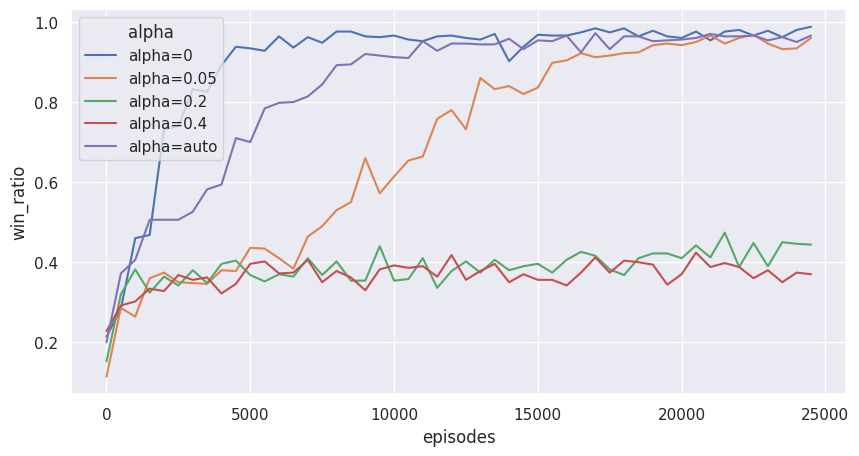

In [19]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(10, 5)})
 
ax = sns.lineplot(x='episodes', y='win_ratio', hue='alpha', data=winner_df)
fig = ax.get_figure()
fig.savefig('different_alphas_plot')

In [24]:
winner_df

,episodes,alpha,win_ratio
0,0,alpha=0,0.214
1,500,alpha=0,0.284
2,1000,alpha=0,0.460
3,1500,alpha=0,0.468
4,2000,alpha=0,0.732
...,...,...,...
245,22500,alpha=auto,0.966
246,23000,alpha=auto,0.954
247,23500,alpha=auto,0.962
248,24000,alpha=auto,0.950
